# **Importing required packages**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
import pickle

#**Importing data**

In [91]:
df=pd.read_excel('/content/drive/MyDrive/Flight Price prediction using Flask/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#**Understanding our dataset**

In [92]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

# We can see that maximum number of people are travelling to Cochin and aslo we have Delhi and New Delhi as different destination but they are same


## Merging Delhi and New Delhi

In [93]:
def change(name):
  if name=='New Delhi':
    return 'Delhi'
  else:
    return name

df.Destination=df.Destination.apply(change)

In [94]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

## Splitling date in month and day column

In [95]:
df.Jounrney_Day=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day

<ipython-input-95-c9e9ddd2365b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Jounrney_Day=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day


In [96]:
df["Jounrney_Month"]=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [97]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [98]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jounrney_Month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


In [99]:
df["Jounrney_Day"]=df.Jounrney_Day

In [100]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jounrney_Month,Jounrney_Day
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


## Extracting hours and minutes from time

In [101]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jounrney_Month,Jounrney_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Extracting information from Duration column

In [102]:
duration = list(df['Duration'])
for i in range(len(duration)):
  if len(duration[i].split())!= 2:
    if 'h' in duration[i]:
      duration[i]=duration[i]+ ' 0m'
    else:
      duration[i]='0h '+duration[i]

duration_hour = []
duration_min = []

for i in duration:
  h,m=i.split()
  duration_hour.append(int(h[:-1]))
  duration_min.append(int(m[:-1]))


df['Duration_hours'] = duration_hour
df['Duration_mins'] = duration_min
df.drop('Duration',axis=1,inplace=True)
df.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jounrney_Month,Jounrney_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


## Checking for null values

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Jounrney_Month   10683 non-null  int64 
 8   Jounrney_Day     10683 non-null  int64 
 9   Dep_hour         10683 non-null  int64 
 10  Dep_min          10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_min      10683 non-null  int64 
 13  Duration_hours   10683 non-null  int64 
 14  Duration_mins    10683 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


Route and Total_Stops have 1 1 null values so we will manage it further


In [104]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [105]:
df.Route.isnull().sum()

1

In [106]:
df.Total_Stops.isnull().sum()

1

We can see that there is not any requirement of Route and Additional_Info column




In [107]:
df.drop(['Route','Additional_Info'],inplace=True,axis=1)

# **Creating Visualization and Undersatanding Dataset**

## Plotting Airline vs Price

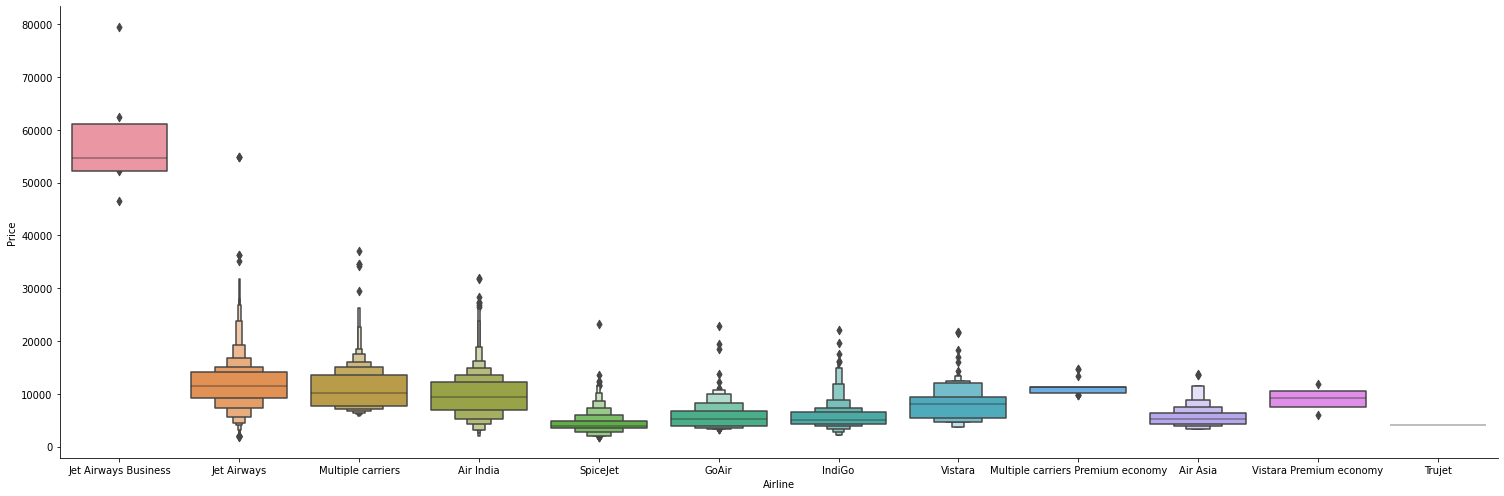

In [108]:
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=7)

Form above we can see that Jet Airways Business is expensive among all



In [109]:
airline = df[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)

In [110]:
airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


## Plotting Source vs Price

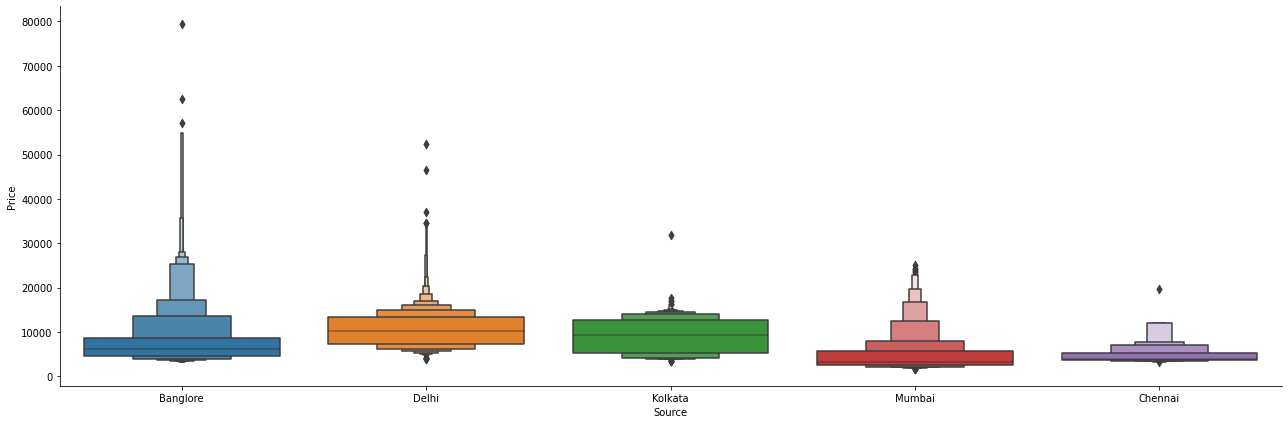

In [111]:
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6)

The plot below says that if you are going from Bangalore, no matter where you have to pay the highest amount of money.

In [112]:
source = df[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## Plotting Destination vs Price

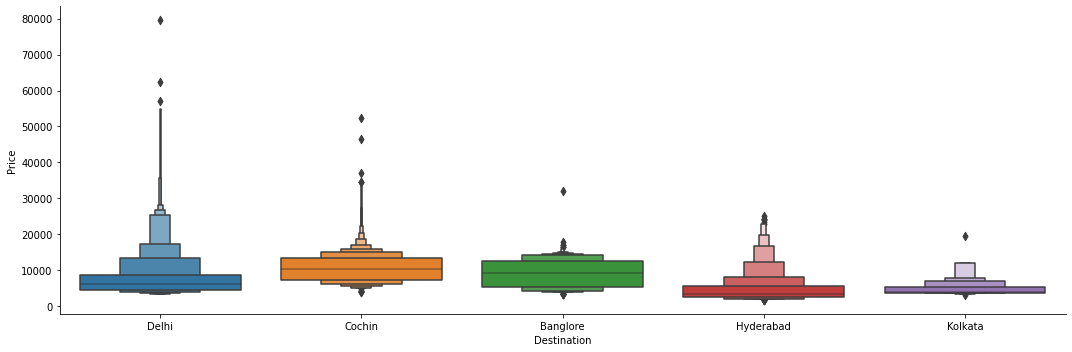

In [113]:
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=5)

The plot below says that if you are going to New Delhi, no matter from where, you have to pay the highest amount of money

In [114]:
destination =df[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


# **Column Operations**

In [115]:
print(airline.shape)
print(source.shape)
print(destination.shape)
print(df.shape)

(10683, 11)
(10683, 4)
(10683, 4)
(10683, 13)


In [116]:
df_2 = pd.concat([df,airline,source,destination],axis=1)
df_2.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df_2.head()

,Total_Stops,Price,Jounrney_Month,Jounrney_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,non-stop,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2 stops,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2 stops,13882,6,9,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1 stop,6218,5,12,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1 stop,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [117]:
df_2['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [118]:
df_2['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df_2["Total_Stops"].replace(np.nan,0,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Jounrney_Month,Jounrney_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,3,1,16,50,21,35,4,45


# **Selecting Independent Variables & Target Variable**

## Independent Variables

In [119]:
x=df_2.drop('Price',axis=1)
x

,Total_Stops,Jounrney_Month,Jounrney_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,3,24,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,5,1,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,6,9,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1.0,5,12,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4,9,19,55,22,25,2,30,0,...,0,0,0,0,1,0,0,0,0,0
10679,0.0,4,27,20,45,23,20,2,35,1,...,0,0,0,0,1,0,0,0,0,0
10680,0.0,4,27,8,20,11,20,3,0,0,...,0,0,0,0,0,0,0,1,0,0
10681,0.0,3,1,11,30,14,10,2,40,0,...,1,0,0,0,0,0,0,1,0,0


## Dependent/Target Variables

In [120]:
y = df_2['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

# **Feature Selection using Heat Map**

<Axes: >

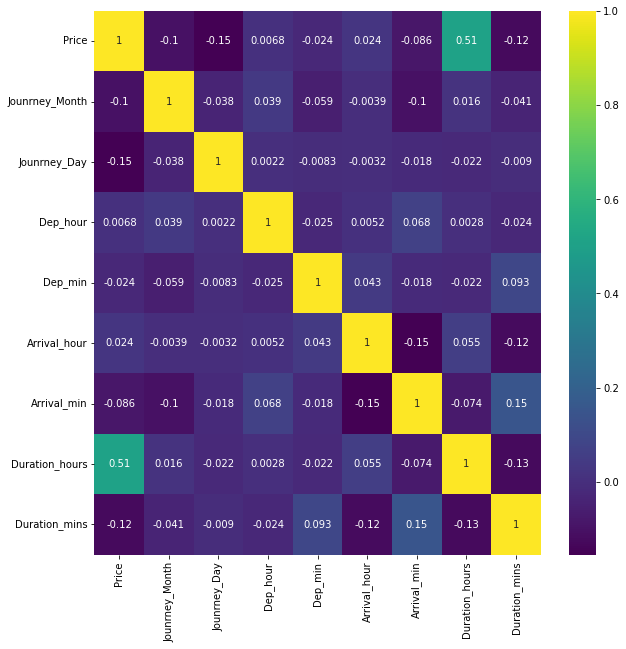

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

 

*   We can see that Total_stops is highly correlated with Duration_hours which is very obvious. If the no. of stops would increase, the duration hours of the flight will also increase.
*   Also, price is highly correlated with total stops because if stops would increase that would also require a high quantity of fuel, and that would increase the price.




Form above we can see that Price is highly corelated with Total_stop & Duration hours but its not sufficient for price prediction.

# **Feature Selection using feature_importance_**

In [122]:
reg=ExtraTreesRegressor()

In [125]:
reg.fit(x,y)
print(reg.feature_importances_)

[2.41815840e-01 5.87765718e-02 1.43297806e-01 2.44353789e-02
 2.11949844e-02 2.82636054e-02 1.90911742e-02 1.14305649e-01
 1.77723824e-02 1.03668815e-02 1.88179232e-03 1.87171522e-02
 1.40300091e-01 6.69674567e-02 1.92404230e-02 8.99568584e-04
 4.97304833e-03 8.96175632e-05 4.90377303e-03 6.48475819e-05
 7.36439264e-04 8.95840086e-03 4.82905300e-03 1.05228098e-02
 1.11072486e-02 1.82619658e-02 7.55811198e-03 6.67926477e-04]


## Plotting graph of feature importances for better visualization

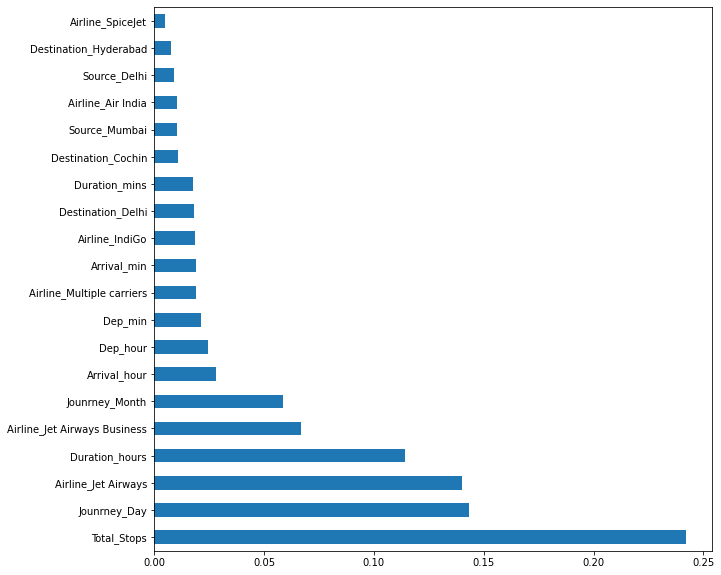

In [126]:
plt.figure(figsize=(10,10))
imp_feat=pd.Series(reg.feature_importances_,index=x.columns)
imp_feat.nlargest(20).plot(kind='barh')
plt.show()



1.   Total_stops is the feature with the highest feature importance in deciding the Price as we have also seen above.

2.   After that Journey Day also plays a big role in deciding the Price. Prices are generally higher on weekends.



# **Splitting our data into Training and Testing data**

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# **Training Random Forest Regressor model**

In [128]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [129]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

# **Prediction**

In [131]:
prediction = rf_random.predict(x_test)

<ipython-input-132-b322b1d393bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


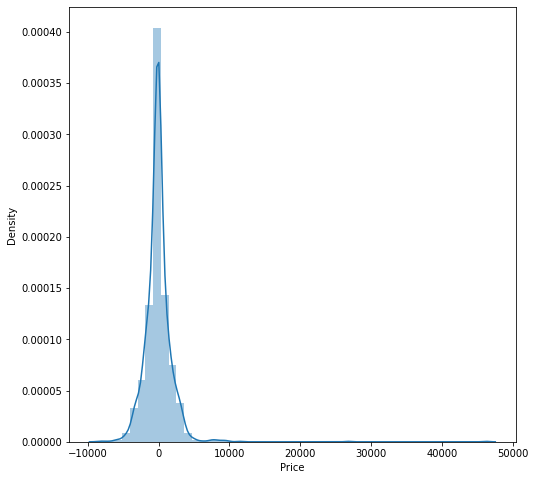

In [132]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

As we can see that most of the residuals are 0, which means our model is generalizing well.

# **Checking Prediction**

## Plotting y_test vs predictions

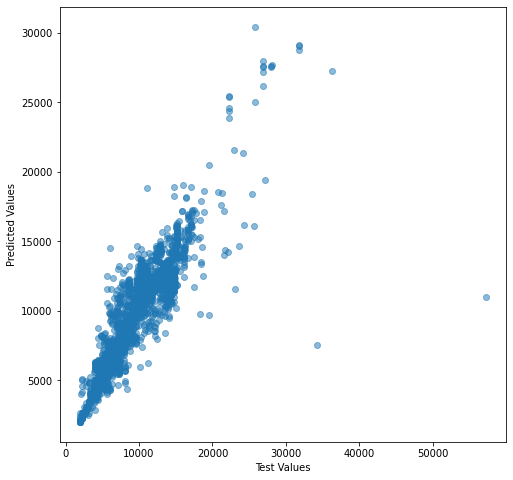

In [134]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.show()

Its approx straight line. it imples that our model is good

In [136]:
print('r2 score: ', metrics.r2_score(y_test,prediction))

r2 score:  0.8018560924694773


This is a good accuracy as 80%

# **Exporting Model**

In [137]:
file = open('flight.pkl', 'wb')
pickle.dump(rf_random, file)